In [1]:
from xgcm import Grid
import pop_tools
import gcsfs
import fsspec as fs
import numpy as np
import xesmf as xe
import xarray as xr
import random
import matplotlib.pyplot as plt
import warnings
from xgcm import Grid
import importlib
import preprocessing
import gcm_filters
import xrft

warnings.filterwarnings("ignore")

importlib.reload(preprocessing)
from preprocessing import preprocess_data
from gcm_filtering import filter_inputs_dataset
from gcm_filtering import filter_inputs

In [2]:
import aerobulk
from aerobulk import noskin

In [3]:
ds_merged = preprocess_data()
ds_merged

Load Data
Interpolating ocean velocities
Modify units
Load Data
Align in time
Interpolating ocean velocities
Regrid Atmospheric Data
Modify units
Mask nans
Calculate relative wind


<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
    dxt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    dyt           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolat_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    geolon_t      (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    ht            (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    kmt           (yt_ocean, xt_ocean) float32 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    wet           (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
    area_t        (yt_ocean, xt_ocean) float64 dask.array<chunksize=(2700, 3600), meta=np.ndarray>
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [4]:
ds_in = ds_merged
ds_in = ds_in.drop(['area_t', 'dxt', 'dyt', 'geolat_t', 'geolon_t', 'ht', 'kmt', 'wet'])
# ds_in.isel(time=slice(0,50,5), xt_ocean=slice(0,3600), yt_ocean=slice(500,550))
ds_in

<xarray.Dataset>
Dimensions:       (time: 7305, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    regrid_method:  bilinear

In [5]:
print("Filtering model")
ds_out_50 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50
ds_out_100 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=100, filter_type='gaussian')
ds_out_100
ds_out_150 = filter_inputs_dataset(ds_in, ['yt_ocean', 'xt_ocean'], filter_scale=150, filter_type='gaussian')
ds_out_150

Filtering model


<xarray.Dataset>
Dimensions:       (time: 7305, xt_ocean: 3600, yt_ocean: 2700)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0200-12-31 12:00:00
  * xt_ocean      (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean      (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 2700, 3600), meta=np.ndarray>
Attributes:
    filter_scale:  150
    filter_type:   gaussian

In [6]:
variables = ["slp", "v_ref", "u_ref", "t_ref", "q_ref", "wind", "rh_ref", 
             "surface_temp", "u_ocean", "v_ocean", "u_relative", "v_relative"]

In [7]:
from distributed import LocalCluster, Client
cluster = LocalCluster(n_workers=4, threads_per_worker=2)
client = Client(cluster)
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /user/panalluri/proxy/8787/status,
Dashboard: /user/panalluri/proxy/8787/status,Workers: 4
Total threads: 8,Total memory: 64.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:36881,Workers: 4
Dashboard: /user/panalluri/proxy/8787/status,Total threads: 8
Started: Just now,Total memory: 64.00 GiB
Comm: tcp://127.0.0.1:42229,Total threads: 2
Dashboard: /user/panalluri/proxy/45393/status,Memory: 16.00 GiB
Nanny: tcp://127.0.0.1:43159,


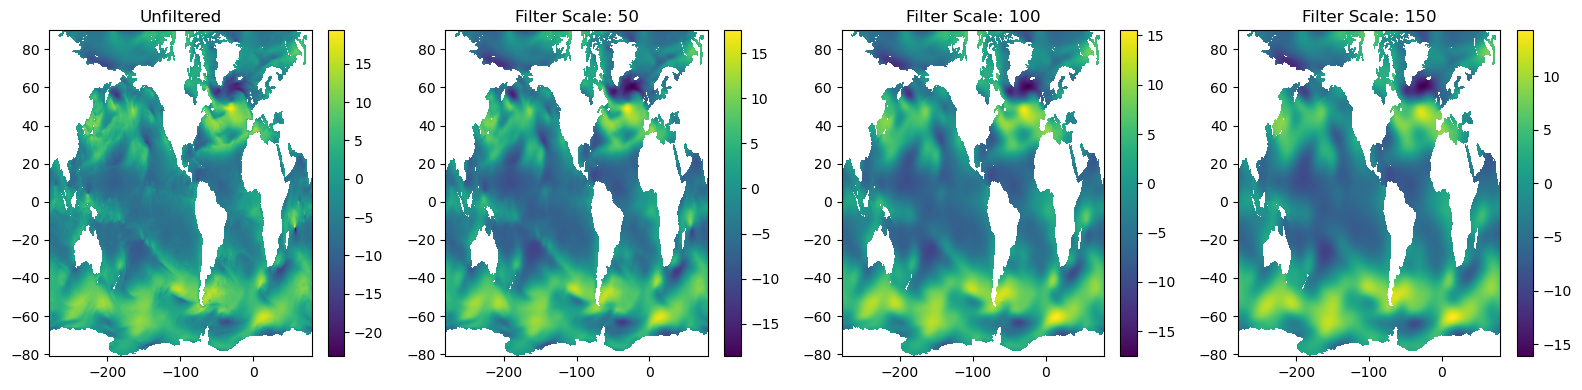

In [17]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

# Extract x and y axis values
x = ds_out_150.xt_ocean
y = ds_out_150.yt_ocean

# Replace imshow with pcolor, setting x and y axes, and add colorbars
c1 = ax1.pcolor(x, y, ds_in.u_ref[0], cmap="viridis")
fig.colorbar(c1, ax=ax1)
ax1.set_title("Unfiltered")

c2 = ax2.pcolor(x, y, ds_out_50.u_ref[0], cmap="viridis")
fig.colorbar(c2, ax=ax2)
ax2.set_title("Filter Scale: 50")

c3 = ax3.pcolor(x, y, ds_out_100.u_ref[0], cmap="viridis")
fig.colorbar(c3, ax=ax3)
ax3.set_title("Filter Scale: 100")

c4 = ax4.pcolor(x, y, ds_out_150.u_ref[0], cmap="viridis")
fig.colorbar(c4, ax=ax4)
ax4.set_title("Filter Scale: 150")

plt.tight_layout()
plt.show()


# Air-Sea Flux Anomaly Movies

## East Pacific Ocean Case

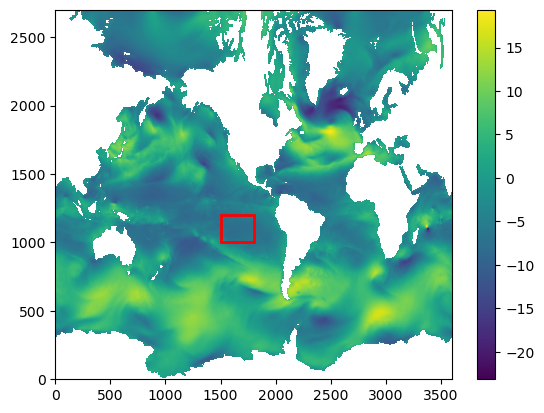

In [8]:
# Extract the data for the specific region
data = ds_in.u_ref.isel(time=0)

# Plot the data using pcolor
plt.pcolor(data, cmap='viridis')

# Get the bounds of the region (using the indices)
x_min, x_max = 1500, 1800
y_min, y_max = 1000, 1200

# Draw a rectangle around the region (the coordinates are based on the index positions)
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)  # Add the rectangle to the current axes

# Show the plot
plt.colorbar()
plt.show()


In [9]:
data_high_res_Epac = ds_in.isel(time=slice(0,50), xt_ocean=slice(1500,1800), yt_ocean=slice(1000,1200))

print("Filtering model")
ds_out_50_Epac = filter_inputs_dataset(data_high_res_Epac, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50_Epac
ds_out_100_Epac = filter_inputs_dataset(data_high_res_Epac, ['yt_ocean', 'xt_ocean'], filter_scale=100, filter_type='gaussian')
ds_out_100_Epac
ds_out_150_Epac = filter_inputs_dataset(data_high_res_Epac, ['yt_ocean', 'xt_ocean'], filter_scale=150, filter_type='gaussian')
ds_out_150_Epac

Filtering model


<xarray.Dataset>
Dimensions:       (time: 50, xt_ocean: 300, yt_ocean: 200)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0181-02-19 12:00:00
  * xt_ocean      (xt_ocean) float64 -130.0 -129.9 -129.8 ... -100.2 -100.1
  * yt_ocean      (yt_ocean) float64 -23.74 -23.65 -23.56 ... -4.645 -4.545
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 200, 300), meta=np.ndarray>
Attributes:
    filter_scale:  150
    filter_type:   gaussian

### Filtered Air-Sea Flux Anomalies

In [10]:
snapshot = data_high_res_Epac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_unfiltered = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_unfiltered = ql + qh
freshflux_unfiltered = evap

In [11]:
snapshot = ds_out_50_Epac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_50 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_50 = ql + qh
freshflux_50 = evap

momflux_anom_50_Epac = momflux_unfiltered - momflux_50
heatflux_anom_50_Epac = heatflux_unfiltered - heatflux_50
freshflux_anom_50_Epac = freshflux_unfiltered - freshflux_50

In [12]:
snapshot = ds_out_100_Epac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_100 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_100 = ql + qh
freshflux_100 = evap

momflux_anom_100_Epac = momflux_unfiltered - momflux_100
heatflux_anom_100_Epac = heatflux_unfiltered - heatflux_100
freshflux_anom_100_Epac = freshflux_unfiltered - freshflux_100

In [13]:
snapshot = ds_out_150_Epac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_150 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_150 = ql + qh
freshflux_150 = evap

momflux_anom_150_Epac = momflux_unfiltered - momflux_150
heatflux_anom_150_Epac = heatflux_unfiltered - heatflux_150
freshflux_anom_150_Epac = freshflux_unfiltered - freshflux_150

In [14]:
from PIL import Image
import os

# data_HR_thruTime = ds_in.isel(xt_ocean=slice(0,3600), yt_ocean=slice(500,550))

# Example plotting function for high-resolution (HR) data only
def plot_fun(idt, var, vmin, vmax): 
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the high-resolution data
    data_HR_thruTime.isel(time=idt).plot(ax=ax, x='xt_ocean', y='yt_ocean', cmap='bwr', robust=True, vmin=vmin, vmax=vmax)
    ax.set_title(f'Flux Anomaly - Frame {idt}')

# Animation creation function remains unchanged
def create_animation(fun, idx, var, filename='my-animation.gif', dpi=200, FPS=18, loop=0):
    # Compute global min and max for the variable
    vmin = data_HR_thruTime[0].min().compute()
    vmax = data_HR_thruTime[0].max().compute()
    
    frames = []
    for i in idx:
        fun(i, var, vmin, vmax)
        plt.savefig('.frame.png', dpi=dpi, bbox_inches='tight')
        plt.close()
        frames.append(Image.open('.frame.png').convert('RGB'))
        print(f'Frame {i} is created', end='\r')
    os.system('rm .frame.png')
    duration = 1000 / FPS
    print(f'Animation at FPS={FPS} will last for {len(idx)/FPS} seconds')
    frames[0].save(
        filename, format='GIF',
        append_images=frames[1:],
        save_all=True,
        duration=duration,
        loop=loop)


In [15]:
# Call the animation creation 
data_HR_thruTime = momflux_anom_50_Epac
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_eastPacific_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = momflux_anom_100_Epac
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_eastPacific_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = momflux_anom_150_Epac
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_eastPacific_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


In [16]:
# Call the animation creation 
data_HR_thruTime = heatflux_anom_50_Epac
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_eastPacific_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = heatflux_anom_100_Epac
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_eastPacific_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = heatflux_anom_150_Epac
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_eastPacific_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


In [17]:
# Call the animation creation 
data_HR_thruTime = freshflux_anom_50_Epac
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_eastPacific_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = freshflux_anom_100_Epac
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_eastPacific_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = freshflux_anom_150_Epac
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_eastPacific_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


## Gulf Stream Case

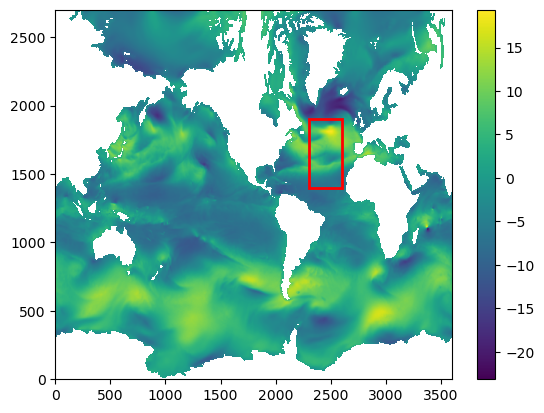

In [48]:
# Extract the data for the specific region
data = ds_in.u_ref.isel(time=0)

# Plot the data using pcolor
plt.pcolor(data, cmap='viridis')

# Get the bounds of the region (using the indices)
x_min, x_max = 2300, 2600
y_min, y_max = 1400, 1900


# Draw a rectangle around the region (the coordinates are based on the index positions)
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)  # Add the rectangle to the current axes

# Show the plot
plt.colorbar()
plt.show()


In [18]:
data_high_res_gulf = ds_in.isel(time=slice(0,50), xt_ocean=slice(2300,2600), yt_ocean=slice(1400,1900))

print("Filtering model")
ds_out_50_gulf = filter_inputs_dataset(data_high_res_gulf, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50_gulf
ds_out_100_gulf = filter_inputs_dataset(data_high_res_gulf, ['yt_ocean', 'xt_ocean'], filter_scale=100, filter_type='gaussian')
ds_out_100_gulf
ds_out_150_gulf = filter_inputs_dataset(data_high_res_gulf, ['yt_ocean', 'xt_ocean'], filter_scale=150, filter_type='gaussian')
ds_out_150_gulf

Filtering model


<xarray.Dataset>
Dimensions:       (time: 50, xt_ocean: 300, yt_ocean: 500)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0181-02-19 12:00:00
  * xt_ocean      (xt_ocean) float64 -49.95 -49.85 -49.75 ... -20.15 -20.05
  * yt_ocean      (yt_ocean) float64 15.36 15.46 15.56 ... 54.49 54.55 54.61
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 500, 300), meta=np.ndarray>
Attributes:
    filter_scale:  150
    filter_type:   gaussian

### Filtered Air-Sea Flux Anomalies

In [19]:
snapshot = data_high_res_gulf

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_unfiltered = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_unfiltered = ql + qh
freshflux_unfiltered = evap

In [20]:
snapshot = ds_out_50_gulf

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_50 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_50 = ql + qh
freshflux_50 = evap

momflux_anom_50_gulf = momflux_unfiltered - momflux_50
heatflux_anom_50_gulf = heatflux_unfiltered - heatflux_50
freshflux_anom_50_gulf = freshflux_unfiltered - freshflux_50

In [21]:
snapshot = ds_out_100_gulf

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_100 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_100 = ql + qh
freshflux_100 = evap

momflux_anom_100_gulf = momflux_unfiltered - momflux_100
heatflux_anom_100_gulf = heatflux_unfiltered - heatflux_100
freshflux_anom_100_gulf = freshflux_unfiltered - freshflux_100

In [22]:
snapshot = ds_out_150_gulf

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_150 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_150 = ql + qh
freshflux_150 = evap

momflux_anom_150_gulf = momflux_unfiltered - momflux_150
heatflux_anom_150_gulf = heatflux_unfiltered - heatflux_150
freshflux_anom_150_gulf = freshflux_unfiltered - freshflux_150

In [23]:
# Call the animation creation 
data_HR_thruTime = momflux_anom_50_gulf
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_gulf_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = momflux_anom_100_gulf
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_gulf_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = momflux_anom_150_gulf
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_gulf_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


In [24]:
# Call the animation creation 
data_HR_thruTime = heatflux_anom_50_gulf
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_gulf_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = heatflux_anom_100_gulf
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_gulf_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = heatflux_anom_150_gulf
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_gulf_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


In [25]:
# Call the animation creation 
data_HR_thruTime = freshflux_anom_50_gulf
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_gulf_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = freshflux_anom_100_gulf
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_gulf_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = freshflux_anom_150_gulf
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_gulf_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


## Pacific Ocean case

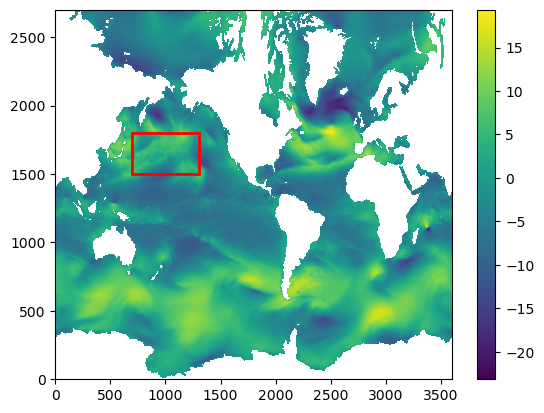

In [26]:
# Extract the data for the specific region
data = ds_in.u_ref.isel(time=0)

# Plot the data using pcolor
plt.pcolor(data, cmap='viridis')

# Get the bounds of the region (using the indices)
x_min, x_max = 700, 1300
y_min, y_max = 1500, 1800

# Draw a rectangle around the region (the coordinates are based on the index positions)
rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)  # Add the rectangle to the current axes

# Show the plot
plt.colorbar()
plt.show()


In [27]:
data_high_res_pac = ds_in.isel(time=slice(0,50), xt_ocean=slice(700,1300), yt_ocean=slice(1500,1800))

print("Filtering model")
ds_out_50_pac = filter_inputs_dataset(data_high_res_pac, ['yt_ocean', 'xt_ocean'], filter_scale=50, filter_type='gaussian')
ds_out_50_pac
ds_out_100_pac = filter_inputs_dataset(data_high_res_pac, ['yt_ocean', 'xt_ocean'], filter_scale=100, filter_type='gaussian')
ds_out_100_pac
ds_out_150_pac = filter_inputs_dataset(data_high_res_pac, ['yt_ocean', 'xt_ocean'], filter_scale=150, filter_type='gaussian')
ds_out_150_pac

Filtering model


<xarray.Dataset>
Dimensions:       (time: 50, xt_ocean: 600, yt_ocean: 300)
Coordinates:
  * time          (time) object 0181-01-01 12:00:00 ... 0181-02-19 12:00:00
  * xt_ocean      (xt_ocean) float64 -209.9 -209.8 -209.7 ... -150.2 -150.1
  * yt_ocean      (yt_ocean) float64 24.74 24.83 24.92 ... 48.26 48.33 48.39
Data variables:
    slp           (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    v_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    u_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    t_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    q_ref         (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    wind          (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    rh_ref        (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    surface_temp  (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    u_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    v_ocean       (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    u_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
    v_relative    (time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(3, 300, 600), meta=np.ndarray>
Attributes:
    filter_scale:  150
    filter_type:   gaussian

### Filtered Air-Sea Flux Anomalies

In [28]:
snapshot = data_high_res_pac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_unfiltered = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_unfiltered = ql + qh
freshflux_unfiltered = evap

In [29]:
snapshot = ds_out_50_pac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_50 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_50 = ql + qh
freshflux_50 = evap

momflux_anom_50_pac = momflux_unfiltered - momflux_50
heatflux_anom_50_pac = heatflux_unfiltered - heatflux_50
freshflux_anom_50_pac = freshflux_unfiltered - freshflux_50

In [30]:
snapshot = ds_out_100_pac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_100 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_100 = ql + qh
freshflux_100 = evap

momflux_anom_100_pac = momflux_unfiltered - momflux_100
heatflux_anom_100_pac = heatflux_unfiltered - heatflux_100
freshflux_anom_100_pac = freshflux_unfiltered - freshflux_100

In [31]:
snapshot = ds_out_150_pac

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux_150 = np.sqrt( taux ** 2 + tauy ** 2 )
heatflux_150 = ql + qh
freshflux_150 = evap

momflux_anom_150_pac = momflux_unfiltered - momflux_150
heatflux_anom_150_pac = heatflux_unfiltered - heatflux_150
freshflux_anom_150_pac = freshflux_unfiltered - freshflux_150

In [31]:
# Call the animation creation 
data_HR_thruTime = momflux_anom_50_pac
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_pacific_unfiltered-50.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds


In [32]:
# Call the animation creation 
data_HR_thruTime = momflux_anom_100_pac
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_pacific_unfiltered-100.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds


In [33]:
# Call the animation creation 
data_HR_thruTime = momflux_anom_150_pac
create_animation(plot_fun, range(0, 30), "", 'mom_flux_anom_pacific_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds


In [33]:
# Call the animation creation 
data_HR_thruTime = heatflux_anom_50_pac
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_pac_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = heatflux_anom_100_pac
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_pac_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = heatflux_anom_150_pac
create_animation(plot_fun, range(0, 30), "", 'heat_flux_anom_pac_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


In [34]:
# Call the animation creation 
data_HR_thruTime = freshflux_anom_50_pac
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_pac_unfiltered-50.gif', dpi=100, FPS=8)

data_HR_thruTime = freshflux_anom_100_pac
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_pac_unfiltered-100.gif', dpi=100, FPS=8)

data_HR_thruTime = freshflux_anom_150_pac
create_animation(plot_fun, range(0, 30), "", 'fresh_flux_anom_pac_unfiltered-150.gif', dpi=100, FPS=8)

Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds
Animation at FPS=8 will last for 3.75 seconds


# Air-Sea Flux Plots

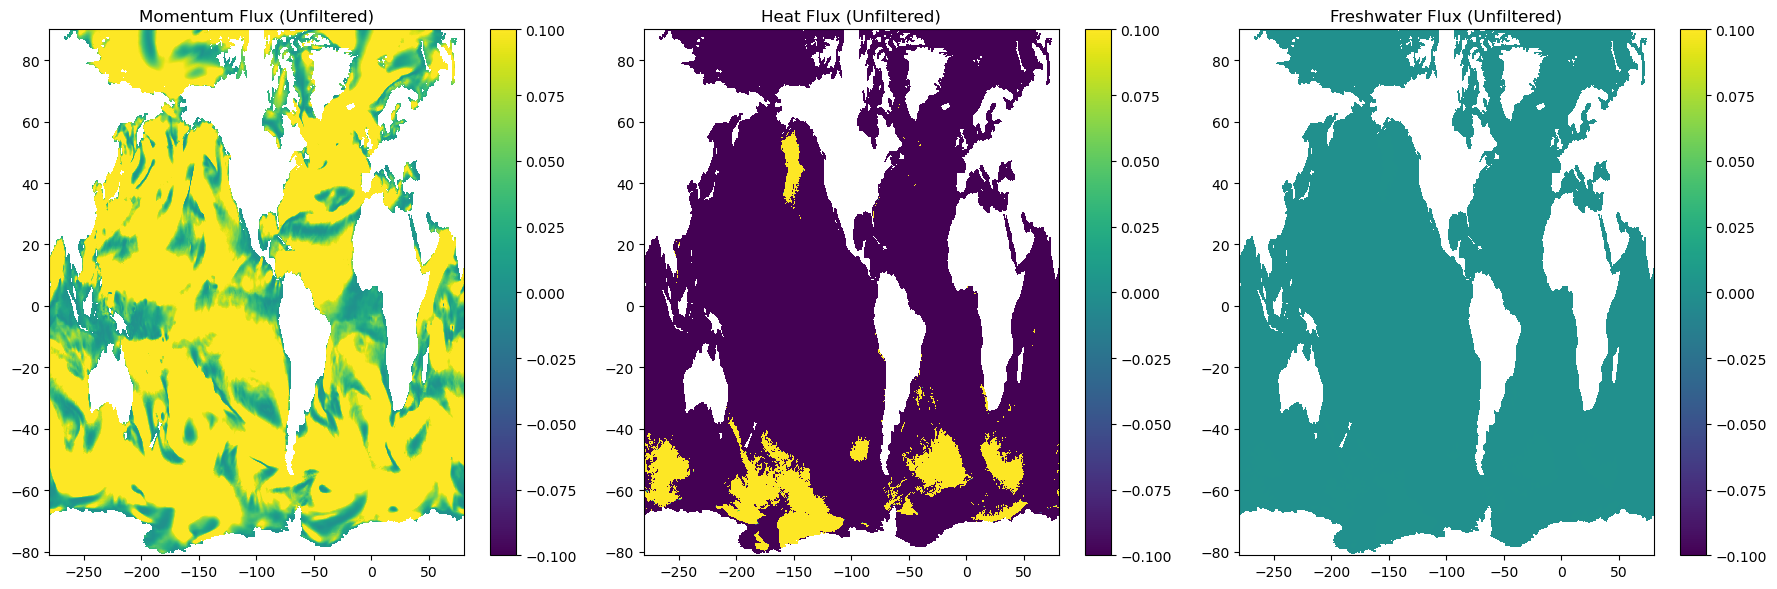

In [30]:
snapshot = ds_in.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 ).values
heatflux = (ql + qh).values
freshflux = evap.values

# Create a horizontal layout for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Get x and y coordinates
x = snapshot.xt_ocean
y = snapshot.yt_ocean

# Add data to each subplot
im1 = ax1.pcolor(x, y, momflux, vmin=momflux.min(), vmax=momflux.max())
ax1.set_title("Momentum Flux (Unfiltered)")
fig.colorbar(im1, ax=ax1) 

im2 = ax2.pcolor(x, y, heatflux, vmin=heatflux.min(), vmax=heatflux.max())
ax2.set_title("Heat Flux (Unfiltered)")
fig.colorbar(im2, ax=ax2) 

im3 = ax3.pcolor(x, y, freshflux, vmin=freshflux.min(), vmax=freshflux.max())
ax3.set_title("Freshwater Flux (Unfiltered)")
fig.colorbar(im3, ax=ax3) 

plt.tight_layout()
plt.show()


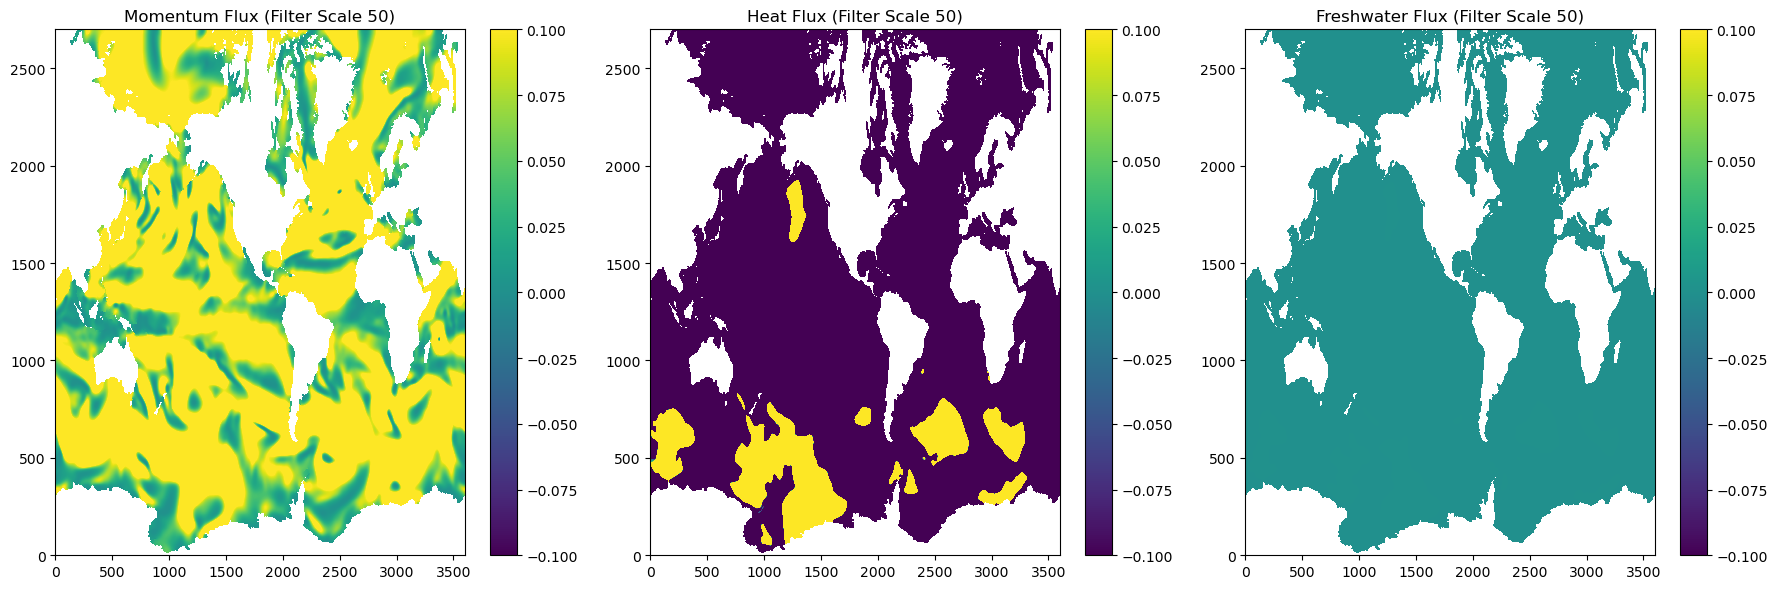

In [35]:
snapshot = ds_out_50.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 ).values
heatflux = (ql + qh).values
freshflux = evap.values

# Create a horizontal layout for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Add data to each subplot
im1 = ax1.pcolor(momflux, vmin=momflux.min(), vmax=momflux.max())
ax1.set_title("Momentum Flux (Filter Scale 50)")
fig.colorbar(im1, ax=ax1) 

im2 = ax2.pcolor(heatflux, vmin=heatflux.min(), vmax=heatflux.max())
ax2.set_title("Heat Flux (Filter Scale 50)")
fig.colorbar(im2, ax=ax2) 

im3 = ax3.pcolor(freshflux, vmin=freshflux.min(), vmax=freshflux.max())
ax3.set_title("Freshwater Flux (Filter Scale 50)")
fig.colorbar(im3, ax=ax3) 

plt.tight_layout()
plt.show()


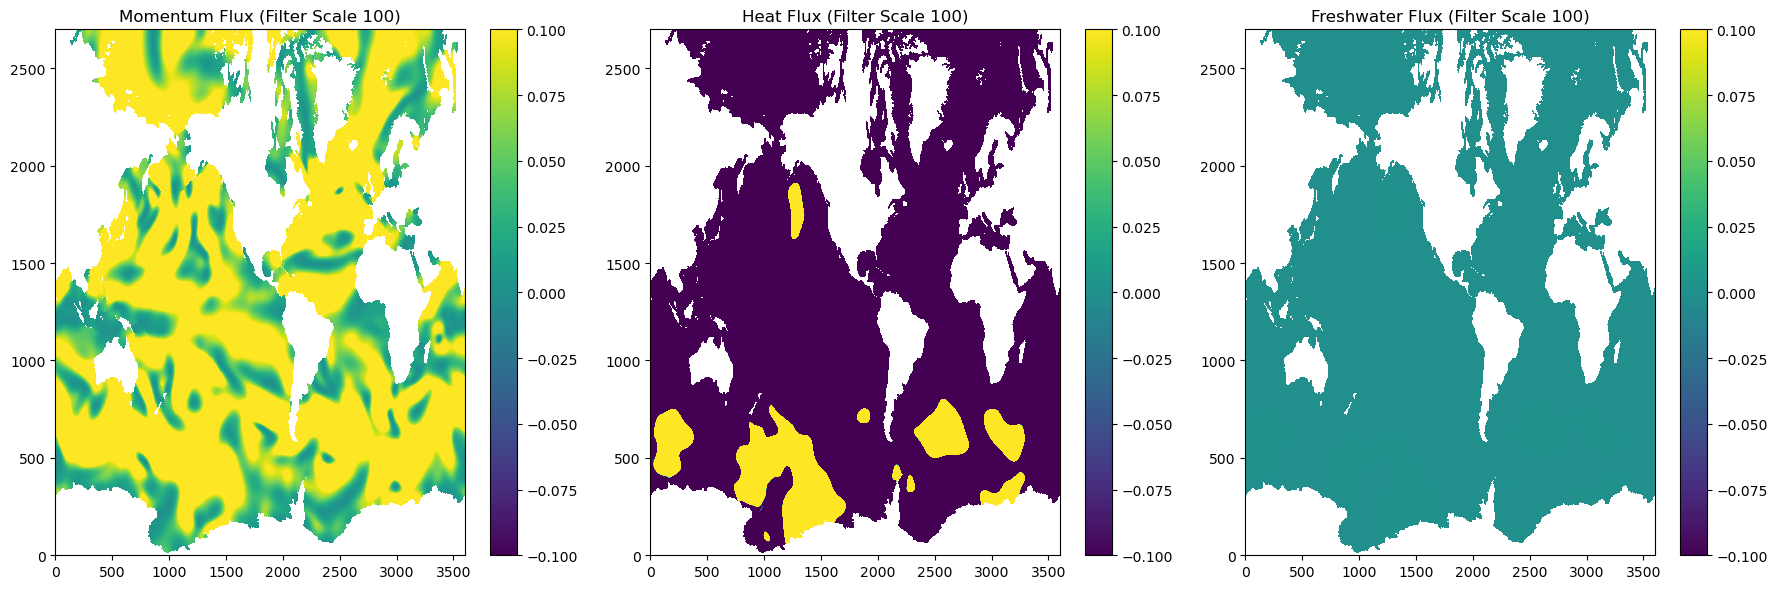

In [36]:
snapshot = ds_out_100.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 ).values
heatflux = (ql + qh).values
freshflux = evap.values

# Create a horizontal layout for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Add data to each subplot
im1 = ax1.pcolor(momflux, vmin=momflux.min(), vmax=momflux.max())
ax1.set_title("Momentum Flux (Filter Scale 100)")
fig.colorbar(im1, ax=ax1) 

im2 = ax2.pcolor(heatflux, vmin=heatflux.min(), vmax=heatflux.max())
ax2.set_title("Heat Flux (Filter Scale 100)")
fig.colorbar(im2, ax=ax2) 

im3 = ax3.pcolor(freshflux, vmin=freshflux.min(), vmax=freshflux.max())
ax3.set_title("Freshwater Flux (Filter Scale 100)")
fig.colorbar(im3, ax=ax3) 

plt.tight_layout()
plt.show()


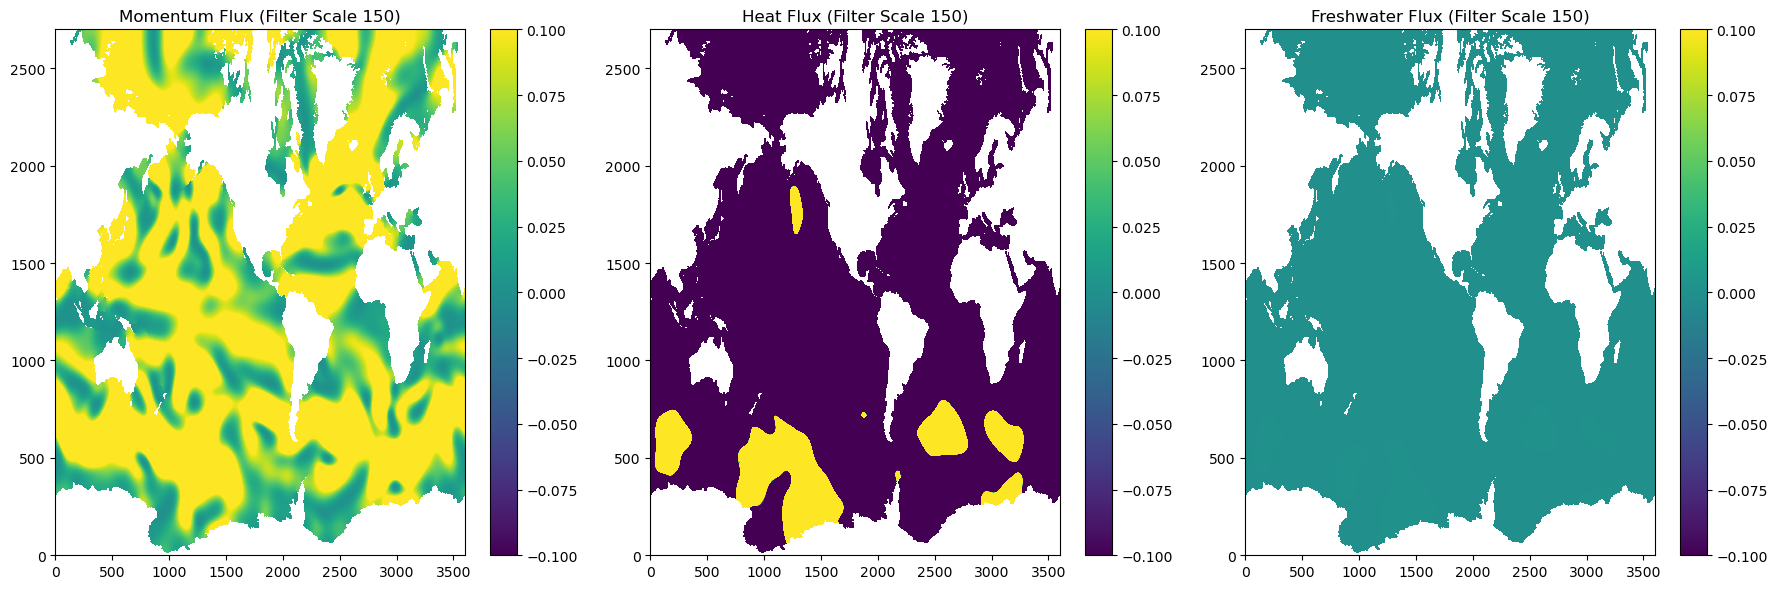

In [37]:
snapshot = ds_out_150.isel(time=0)

ql, qh, taux, tauy, evap =  noskin(
        snapshot.surface_temp,
        snapshot.t_ref,
        snapshot.q_ref,
        snapshot.u_relative,
        snapshot.v_relative,
        slp=snapshot.slp,
        algo='ecmwf',
        zt=2,
        zu=1,
)

momflux = np.sqrt( taux ** 2 + tauy ** 2 ).values
heatflux = (ql + qh).values
freshflux = evap.values

# Create a horizontal layout for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Add data to each subplot
im1 = ax1.pcolor(momflux, vmin=momflux.min(), vmax=momflux.max())
ax1.set_title("Momentum Flux (Filter Scale 150)")
fig.colorbar(im1, ax=ax1) 

im2 = ax2.pcolor(heatflux, vmin=heatflux.min(), vmax=heatflux.max())
ax2.set_title("Heat Flux (Filter Scale 150)")
fig.colorbar(im2, ax=ax2) 

im3 = ax3.pcolor(freshflux, vmin=freshflux.min(), vmax=freshflux.max())
ax3.set_title("Freshwater Flux (Filter Scale 150)")
fig.colorbar(im3, ax=ax3) 

plt.tight_layout()
plt.show()
